Dataset: https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset/data

# EDA


In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,...,4,Entry,Large,45,No,No,Yes,Good,Low,Left


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [4]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [5]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

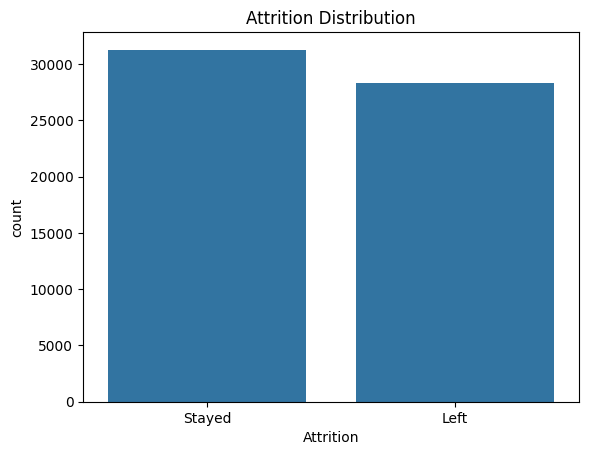

Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

print(df["Attrition"].value_counts())

In [7]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
clean_df = df.drop(columns=["Employee ID"])
clean_df_encoded = pd.DataFrame(enc.fit_transform(clean_df), columns=clean_df.columns)
clean_df_encoded.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,13.0,1.0,18.0,0.0,2611.0,0.0,2.0,0.0,2.0,0.0,...,0.0,1.0,1.0,87.0,0.0,0.0,0.0,0.0,2.0,1.0
1,41.0,0.0,3.0,3.0,2755.0,3.0,0.0,3.0,3.0,0.0,...,3.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0
2,6.0,0.0,9.0,2.0,5380.0,2.0,0.0,3.0,0.0,0.0,...,3.0,1.0,1.0,72.0,0.0,0.0,0.0,3.0,1.0,1.0
3,18.0,0.0,6.0,0.0,1212.0,2.0,0.0,2.0,1.0,0.0,...,2.0,1.0,2.0,48.0,1.0,0.0,0.0,2.0,2.0,1.0
4,38.0,1.0,40.0,0.0,2042.0,1.0,3.0,0.0,0.0,1.0,...,0.0,2.0,1.0,66.0,0.0,0.0,0.0,1.0,2.0,1.0


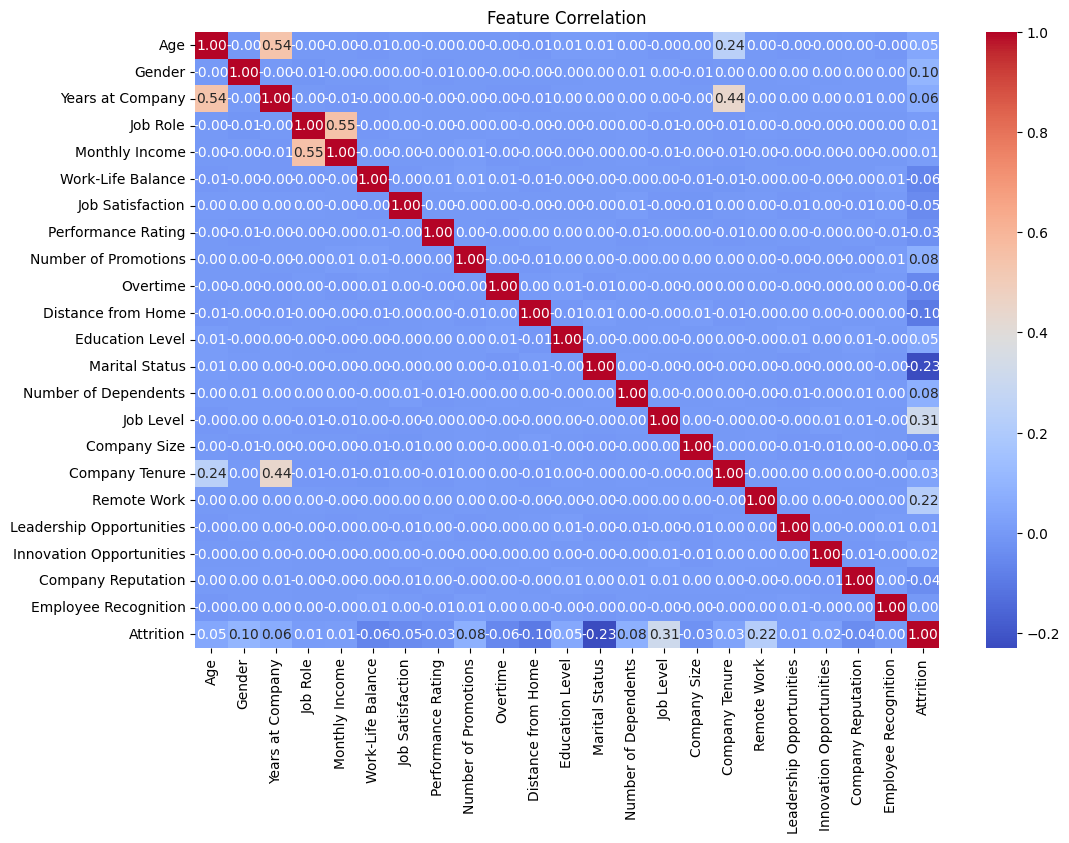

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(clean_df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

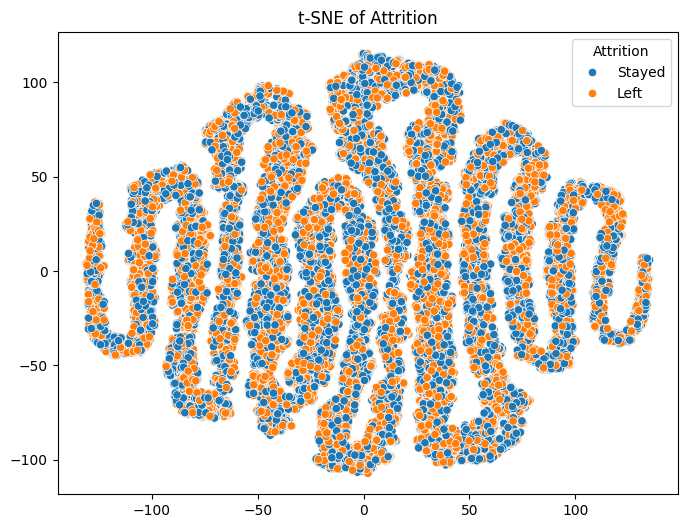

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(clean_df_encoded.drop(columns=['Attrition']), y=clean_df_encoded['Attrition'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=df['Attrition'], palette="tab10")
plt.title("t-SNE of Attrition")
plt.show()

# Classification


## Import data


In [9]:
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("train.csv")

clean_train_df = train_df.drop(columns=["Employee ID"])
train_df_encoded = pd.DataFrame(
    enc.fit_transform(clean_train_df), columns=clean_train_df.columns
)

X_train = train_df_encoded.drop(columns=["Attrition"])
y_train = train_df_encoded["Attrition"]

test_df = pd.read_csv("test.csv")

clean_test_df = test_df.drop(columns=["Employee ID"])
test_df_encoded = pd.DataFrame(
    enc.fit_transform(clean_test_df), columns=clean_test_df.columns
)

X_test = test_df_encoded.drop(columns=["Attrition"])
y_test = test_df_encoded["Attrition"]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## One Rule


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

oner_params = {
    "max_depth": [1],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 5],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", None],
    "class_weight": [
        None,
        "balanced",
    ],
}

oner = DecisionTreeClassifier(max_depth=1, random_state=42)
oner_grid = GridSearchCV(
    oner, param_grid=oner_params, scoring="accuracy", cv=5, n_jobs=-1
)
oner_grid.fit(X_train, y_train)

print(f"Best train accuracy: {oner_grid.best_score_}, Params: {oner_grid.best_params_}")

oner_preds = oner_grid.best_estimator_.predict(X_test)

print("Decision Tree (Depth=1) Accuracy:", accuracy_score(y_test, oner_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, oner_preds))

Best train accuracy: 0.6421524090744517, Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree (Depth=1) Accuracy: 0.6432214765100671
Confusion Matrix:
 [[3441 3591]
 [1725 6143]]


## Naive Bayes


In [11]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

nb_params = {
    "var_smoothing": np.logspace(-3, 1, 15),
}

nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=nb_params, scoring="accuracy", cv=5, n_jobs=-1)
nb_grid.fit(X_train, y_train)

print(f"Best train accuracy: {nb_grid.best_score_}, Params: {nb_grid.best_params_}")

nb_preds = nb_grid.best_estimator_.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))

Best train accuracy: 0.5260746898387381, Params: {'var_smoothing': np.float64(0.001)}
Naive Bayes Accuracy: 0.5304026845637584
Naive Bayes Confusion Matrix:
 [[ 225 6807]
 [ 190 7678]]


## Decision tree


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    "max_depth": [3, 5, 7, 10, 15, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 5],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", None],
    "class_weight": [
        None,
        "balanced",
    ],
}

dt = DecisionTreeClassifier(random_state=42)

dt_grid = GridSearchCV(dt, param_grid=dt_params, scoring="accuracy", cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

print(f"Best train accuracy: {dt_grid.best_score_}, Params: {dt_grid.best_params_}")

dt_preds = dt_grid.best_estimator_.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

Best train accuracy: 0.7289170961597045, Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Decision Tree Accuracy: 0.7308053691275168
Decision Tree Confusion Matrix:
 [[5507 1525]
 [2486 5382]]


## KNN


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    "n_neighbors": list(range(1, 15, 2)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, param_grid=knn_params, scoring="accuracy", cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

print(f"Best train accuracy: {knn_grid.best_score_}, Params: {knn_grid.best_params_}")

knn_preds = knn_grid.best_estimator_.predict(X_test)

print("kNN Accuracy:", accuracy_score(y_test, knn_preds))
print("kNN Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

Best train accuracy: 0.5397832897224049, Params: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
kNN Accuracy: 0.5350335570469799
kNN Confusion Matrix:
 [[3447 3585]
 [3343 4525]]


## Summary


### Detailed


In [40]:
from sklearn.metrics import classification_report

models = {
    "OneR": oner_preds,
    "Naive Bayes": nb_preds,
    "Decision Tree": dt_preds,
    "kNN": knn_preds,
}

results = {}

for name, preds in models.items():
    print(f"--- {name} ---")
    results[name] = classification_report(y_true=y_test, y_pred=preds, zero_division=0, output_dict=True)
    print(classification_report(y_true=y_test, y_pred=preds, zero_division=0))

--- OneR ---
              precision    recall  f1-score   support

         0.0       0.67      0.49      0.56      7032
         1.0       0.63      0.78      0.70      7868

    accuracy                           0.64     14900
   macro avg       0.65      0.64      0.63     14900
weighted avg       0.65      0.64      0.63     14900

--- Naive Bayes ---
              precision    recall  f1-score   support

         0.0       0.54      0.03      0.06      7032
         1.0       0.53      0.98      0.69      7868

    accuracy                           0.53     14900
   macro avg       0.54      0.50      0.37     14900
weighted avg       0.54      0.53      0.39     14900

--- Decision Tree ---
              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73      7032
         1.0       0.78      0.68      0.73      7868

    accuracy                           0.73     14900
   macro avg       0.73      0.73      0.73     14900
weighted avg       

### Accuracy


In [42]:
pd.DataFrame(
    {
        "model name": [name for name, _ in results.items()],
        "test accuracy": [result["accuracy"] for _, result in results.items()],
    }
).sort_values(by='test accuracy', ascending=False)

,model name,test accuracy
2,Decision Tree,0.730805
0,OneR,0.643221
3,kNN,0.535034
1,Naive Bayes,0.530403


Кращий результат показало дерево рішень (73.1%), оскільки воно добре вміє працювати одночасно і з числовими, і з категоріальними фічами, розбиваючи простір на прості логічні умови. OneR теж показав пристойний результат (64.3%) завдяки простоті й фокусу на одній фічі — що може бути ефективним, якщо одна ознака має хоч якийсь зв'язок з цільовим класом.

kNN (53.5%) та Naive Bayes (53.0%) провалились, бо вони погано працюють змішаними типами фіч: kNN страждає через прокляття розмірності, а Naive Bayes — через хибне припущення незалежності фіч. Враховуючи складність простору ознак, найкраще тут працюють інтерпретовані моделі, здатні гнучко адаптувати розбиття — як дерево.